A convolutional neural network (CNN) is a type of artificial neural network used primarily for image recognition and processing, due to its ability to recognize patterns in images. A CNN is a powerful tool but requires millions of labelled data points for training.

In [41]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 24s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
X_test.shape

(10000, 32, 32, 3)

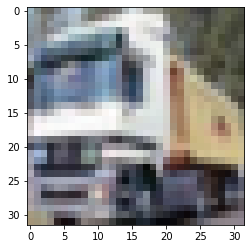

In [12]:
plt.imshow(x_train[1])

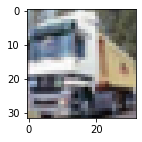

In [13]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [17]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [18]:
classes[9]

'truck'

In [28]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


In [29]:
y_train[0]

6

In [30]:
classes[6]

'frog'

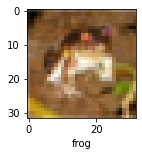

In [31]:
plot_sample(x_train, y_train, 0)

In [34]:
# Normalization
x_train =x_train/255

In [35]:
X_test = X_test/255

In [37]:
# This will perform poorly on this dataset
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [38]:
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [39]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 135s 85ms/step - loss: 1.8130 - accuracy: 0.3530
Epoch 2/5
1563/1563 [==============================] - 128s 82ms/step - loss: 1.6227 - accuracy: 0.4288
Epoch 3/5
1563/1563 [==============================] - 132s 85ms/step - loss: 1.5407 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 168s 108ms/step - loss: 1.4799 - accuracy: 0.4799
Epoch 5/5
1563/1563 [==============================] - 128s 82ms/step - loss: 1.4319 - accuracy: 0.4964


In [42]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 20s 63ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.26      0.39      1000
           1       0.61      0.62      0.62      1000
           2       0.43      0.15      0.23      1000
           3       0.29      0.35      0.31      1000
           4       0.37      0.30      0.33      1000
           5       0.41      0.28      0.33      1000
           6       0.28      0.89      0.42      1000
           7       0.79      0.22      0.34      1000
           8       0.56      0.66      0.61      1000
           9       0.57      0.50      0.53      1000

    accuracy                           0.42     10000
   macro avg       0.51      0.42      0.41     10000
weighted avg       0.51      0.42      0.41     10000



In [45]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Flatten(), # cnn network can figure out dimensions, cnn will do most of the work, no need for many layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [70]:
ann.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10


ValueError: ignored

In [58]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [61]:
plot_sample(X_test, y_test, 1)

NameError: ignored

In [62]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 9, 8, 8, 6]

TypeError: ignored

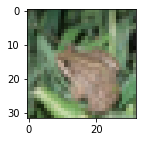

In [66]:
# try for all 5 values
# Actual:
plot_sample(X_test, y_test, 4)

In [64]:
classes[y_classes[1]]

'truck'